In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from keras.layers import SimpleRNN, Activation, LSTM
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

## reuters News Classification

##### 1) Simple RNN Model
##### 2) LSTM 


-  epoch : 50
- batch_size : 32
- optimizer : adam
- loss function : categorical_crossentorpy
- model accuracy 출력

## 데이터 로드

In [6]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [7]:
print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


In [8]:
# 모든 뉴스 기사의 길이를 100으로 동일하게 패딩
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [9]:
#뉴스 기사 데이터의 레이블에 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Simple RNN

In [14]:
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

In [19]:
#각 타임스텝의 출력을 모은 전체 시퀀스를 반환
vocab_size = 1000
embedding_dim = 128
hidden_units = 128


model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim)) # 128의 차원을 가지는 임베딩 벡터를 1,000개 생성
model1.add(SimpleRNN(hidden_units))  #층 개수
model1.add(Dense(num_classes, activation='softmax'))

In [20]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [21]:
history = model1.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
281/281 [==============================] - 5s 15ms/step - loss: 2.3186 - acc: 0.3861 - val_loss: 2.2031 - val_acc: 0.4256
Epoch 2/50
281/281 [==============================] - 5s 17ms/step - loss: 2.0052 - acc: 0.4802 - val_loss: 1.9794 - val_acc: 0.4768
Epoch 3/50
281/281 [==============================] - 5s 18ms/step - loss: 1.8106 - acc: 0.5361 - val_loss: 2.0416 - val_acc: 0.4693
Epoch 4/50
281/281 [==============================] - 4s 14ms/step - loss: 1.6112 - acc: 0.5766 - val_loss: 1.9777 - val_acc: 0.4795
Epoch 5/50
281/281 [==============================] - 4s 15ms/step - loss: 1.4022 - acc: 0.6403 - val_loss: 1.9514 - val_acc: 0.5116
Epoch 6/50
281/281 [==============================] - 5s 19ms/step - loss: 1.2823 - acc: 0.6689 - val_loss: 2.1633 - val_acc: 0.4782
Epoch 7/50
281/281 [==============================] - 5s 19ms/step - loss: 1.1915 - acc: 0.6840 - val_loss: 2.2619 - val_acc: 0.4555
Epoch 8/50
281/281 [==============================] - 4s 15ms/step - 

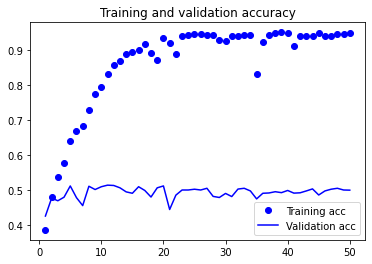

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## LSTM

In [15]:
vocab_size = 1000
embedding_dim = 128
hidden_units = 128

model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim)) # 128의 차원을 가지는 임베딩 벡터를 1,000개 생성
model2.add(LSTM(hidden_units))
model2.add(Dense(num_classes, activation='softmax'))

In [16]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
history = model2.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
281/281 [==============================] - 13s 44ms/step - loss: 2.3357 - acc: 0.4097 - val_loss: 2.0368 - val_acc: 0.4978
Epoch 2/50
281/281 [==============================] - 12s 42ms/step - loss: 1.9196 - acc: 0.5055 - val_loss: 1.7857 - val_acc: 0.5432
Epoch 3/50
281/281 [==============================] - 12s 42ms/step - loss: 1.7494 - acc: 0.5495 - val_loss: 1.7061 - val_acc: 0.5695
Epoch 4/50
281/281 [==============================] - 12s 41ms/step - loss: 1.6566 - acc: 0.5774 - val_loss: 1.6434 - val_acc: 0.5873
Epoch 5/50
281/281 [==============================] - 12s 41ms/step - loss: 1.5594 - acc: 0.6052 - val_loss: 1.5789 - val_acc: 0.6020
Epoch 6/50
281/281 [==============================] - 12s 42ms/step - loss: 1.4764 - acc: 0.6340 - val_loss: 1.5118 - val_acc: 0.6305
Epoch 7/50
281/281 [==============================] - 12s 42ms/step - loss: 1.3902 - acc: 0.6585 - val_loss: 1.4992 - val_acc: 0.6469
Epoch 8/50
281/281 [==============================] - 12s 43ms

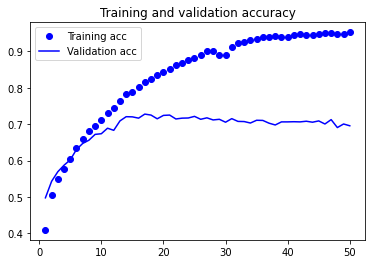

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()